## Importing Iibraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Creating Report using Pandas Profiling

In [ ]:
## the report hepls in better understanding the dataset through its visualization technique
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='fares_report.html')

## Pre-processing

In [4]:
df.drop(["key","Unnamed: 0"],axis =1, inplace = True) 

In [5]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


In [8]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [9]:
df['year']= df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['day_name'] = df['pickup_datetime'].dt.day_name()
df['day_is_weekend']=np.where(df['day_name'].isin(['Sunday','Saturday']),1,0)
df['quarter']=df['pickup_datetime'].dt.quarter
df['hour']=df['pickup_datetime'].dt.hour
df['mins']=df['pickup_datetime'].dt.minute
df['secs']=df['pickup_datetime'].dt.second


In [10]:
df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,day_is_weekend,quarter,hour,mins,secs
57119,13.0,2013-10-17 12:02:20+00:00,-74.005459,40.740743,-73.987014,40.759389,1,2013,10,17,Thursday,0,4,12,2,20
138383,5.5,2012-11-06 19:49:00+00:00,-73.986732,40.739932,-73.979657,40.749282,1,2012,11,6,Tuesday,0,4,19,49,0
55013,7.7,2011-03-03 20:25:00+00:00,-73.986192,40.754598,-73.959465,40.780067,1,2011,3,3,Thursday,0,1,20,25,0
55789,5.5,2012-12-02 19:10:00+00:00,-73.981985,40.746085,-73.985290,40.753342,1,2012,12,2,Sunday,1,4,19,10,0
70424,16.9,2011-01-30 13:03:00+00:00,-73.976042,40.764047,-74.009580,40.719478,1,2011,1,30,Sunday,1,1,13,3,0


In [11]:
df.drop(['pickup_datetime','day_name'],axis=1,inplace=True)

In [12]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_is_weekend,quarter,hour,mins,secs
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,0,2,19,52,6
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,0,3,20,4,56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,3,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,0,2,8,22,21
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,0,3,17,47,0


In [13]:
## calculating distance from latitude and longitude
from math import sin ,cos , asin , sqrt ,radians
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for i in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[i], latitude1[i], longitude2[i], latitude2[i]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        
        c = 2 * asin(sqrt(a)) * 6371  #radius of earth = 6371
        travel_dist.append(c)
            
    return  travel_dist

In [14]:
df['distance_travelled'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())


In [15]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_is_weekend,quarter,hour,mins,secs,distance_travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,0,2,19,52,6,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,0,3,20,4,56,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,3,21,45,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,0,2,8,22,21,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,0,3,17,47,0,4.475450


In [16]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','secs'],axis=1,inplace=True)

In [17]:
df.head()

,fare_amount,passenger_count,year,month,day,day_is_weekend,quarter,hour,mins,distance_travelled
0,7.5,1,2015,5,7,0,2,19,52,1.683323
1,7.7,1,2009,7,17,0,3,20,4,2.457590
2,12.9,1,2009,8,24,0,3,21,45,5.036377
3,5.3,3,2009,6,26,0,2,8,22,1.661683
4,16.0,5,2014,8,28,0,3,17,47,4.475450


## Exploratory Data Analysis

### Uni-variate Analysis

#### Fare_amount

(array([1.68400e+03, 1.97676e+05, 5.81000e+02, 4.10000e+01, 1.20000e+01,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-52. ,   3.1,  58.2, 113.3, 168.4, 223.5, 278.6, 333.7, 388.8,
        443.9, 499. ]),
 <BarContainer object of 10 artists>)

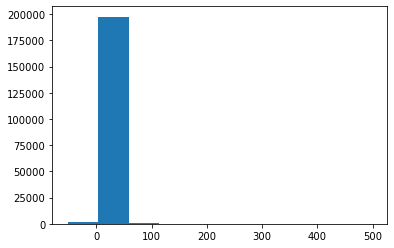

In [17]:
plt.hist(df['fare_amount'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

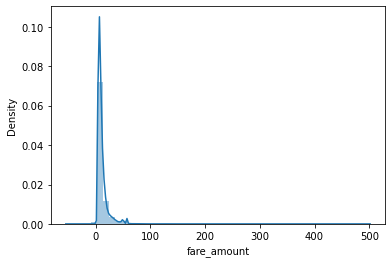

In [20]:
sns.distplot(df['fare_amount'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

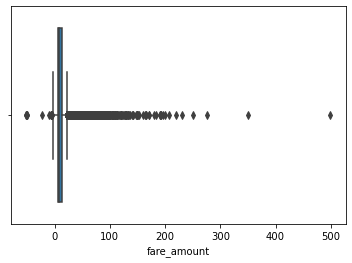

In [21]:
sns.boxplot(df['fare_amount'])

#### Passenger_count

(array([1.99998e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  20.8,  41.6,  62.4,  83.2, 104. , 124.8, 145.6, 166.4,
        187.2, 208. ]),
 <BarContainer object of 10 artists>)

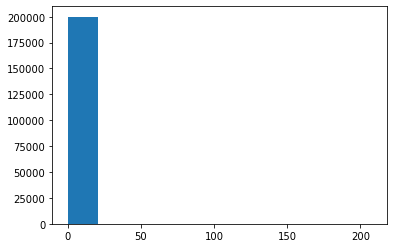

In [24]:
plt.hist(df['passenger_count'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passenger_count', ylabel='Density'>

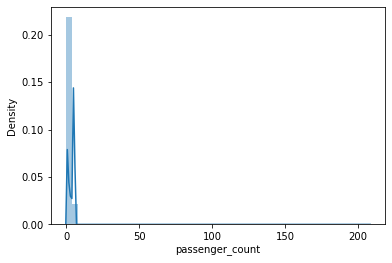

In [25]:
sns.distplot(df['passenger_count'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count'>

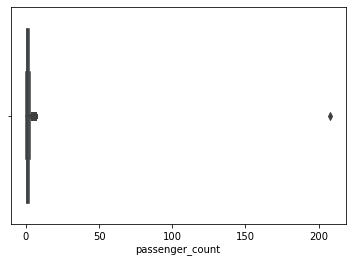

In [26]:
sns.boxplot(df['passenger_count'])

#### Distance_travelled

(array([1.99569e+05, 2.00000e+00, 2.40000e+01, 4.00000e+01, 0.00000e+00,
        3.62000e+02, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.        ,  1640.92391353,  3281.84782706,  4922.77174059,
         6563.69565413,  8204.61956766,  9845.54348119, 11486.46739472,
        13127.39130825, 14768.31522178, 16409.23913531]),
 <BarContainer object of 10 artists>)

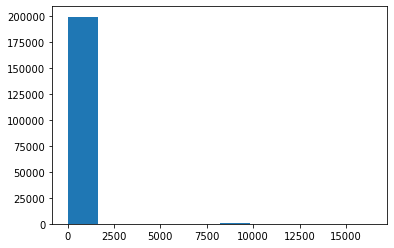

In [27]:
plt.hist(df['distance_travelled'])

<AxesSubplot:xlabel='distance_travelled', ylabel='Density'>

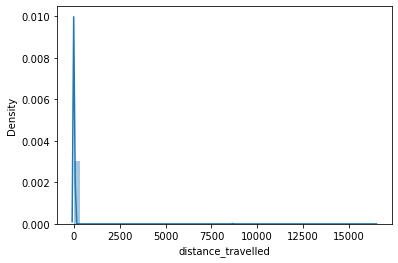

In [30]:
sns.distplot(df['distance_travelled'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled'>

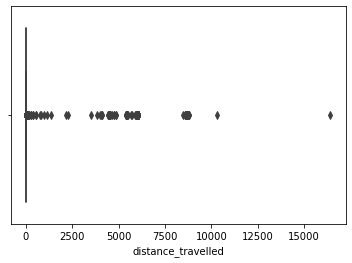

In [31]:
sns.boxplot(df['distance_travelled'])

### Bi-variate & Multi-variate Analysis

In [32]:
df.head()

,fare_amount,passenger_count,year,month,day,day_is_weekend,quarter,hour,mins,distance_travelled
0,7.5,1,2015,5,7,0,2,19,52,1.683323
1,7.7,1,2009,7,17,0,3,20,4,2.457590
2,12.9,1,2009,8,24,0,3,21,45,5.036377
3,5.3,3,2009,6,26,0,2,8,22,1.661683
4,16.0,5,2014,8,28,0,3,17,47,4.475450


In [93]:
df1=df[df['year']==2009]

In [105]:
df.groupby(df['year'])['fare_amount'].sum()

year
2009    305637.75
2010    306002.55
2011    332326.24
2012    363298.45
2013    396465.29
2014    390094.57
2015    178142.10
Name: fare_amount, dtype: float64

year
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
Name: passenger_count, dtype: object

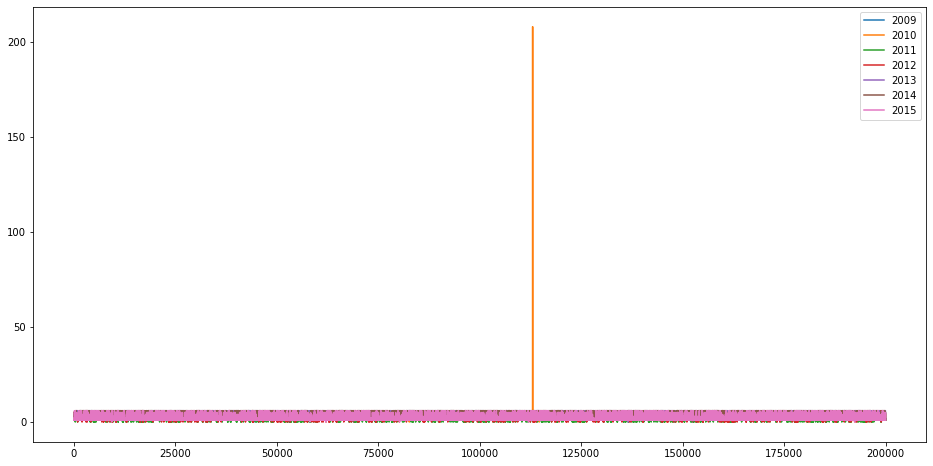

In [18]:
plt.figure(figsize=(16,8))
df.groupby('year')['passenger_count'].plot(legend=True)

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled', ylabel='fare_amount'>

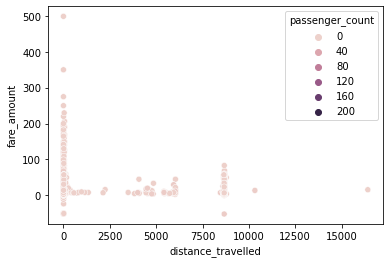

In [35]:
sns.scatterplot(df['distance_travelled'],df['fare_amount'],hue=df['passenger_count'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled', ylabel='fare_amount'>

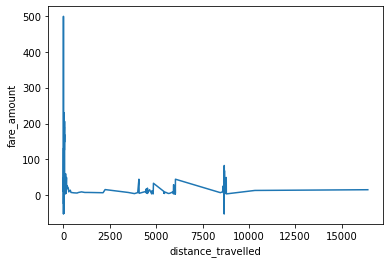

In [38]:
sns.lineplot(df['distance_travelled'],df['fare_amount'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='passenger_count'>

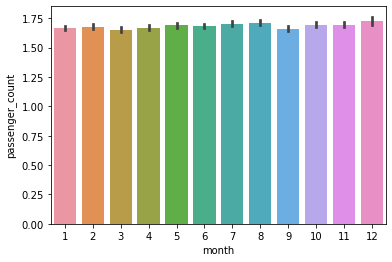

In [53]:
sns.barplot(df['month'],df['passenger_count'])

In [46]:
df[df['passenger_count']>200]

,fare_amount,passenger_count,year,month,day,day_is_weekend,quarter,hour,mins,distance_travelled
113038,11.7,208,2010,12,28,0,4,8,20,0.009825


C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='passenger_count'>

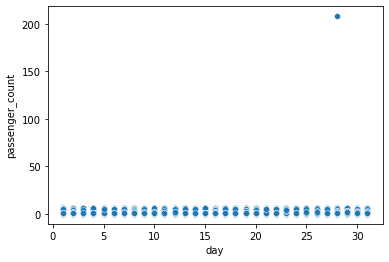

In [47]:
sns.scatterplot(df['day'],df['passenger_count'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='distance_travelled'>

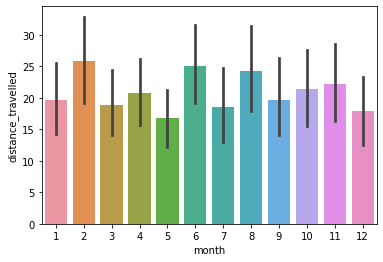

In [60]:
sns.barplot(df['month'],df['distance_travelled'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='distance_travelled'>

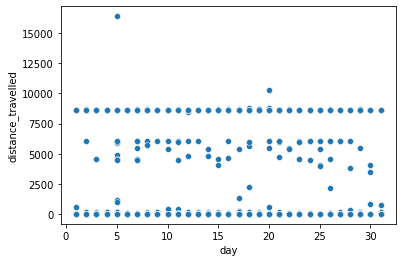

In [59]:
sns.scatterplot(df['day'],df['distance_travelled'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_is_weekend', ylabel='passenger_count'>

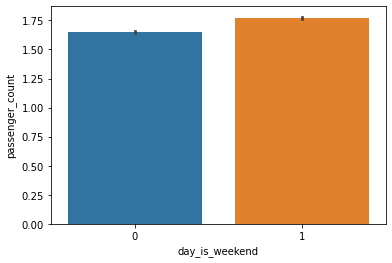

In [57]:
sns.barplot(df['day_is_weekend'],df['passenger_count'])

C:\Users\ADMIN\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quarter', ylabel='fare_amount'>

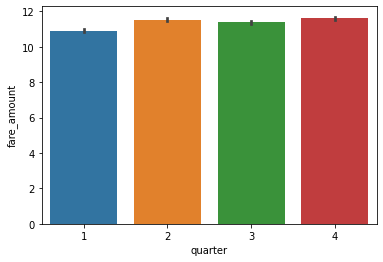

In [55]:
sns.barplot(df['quarter'],df['fare_amount'])

<AxesSubplot:>

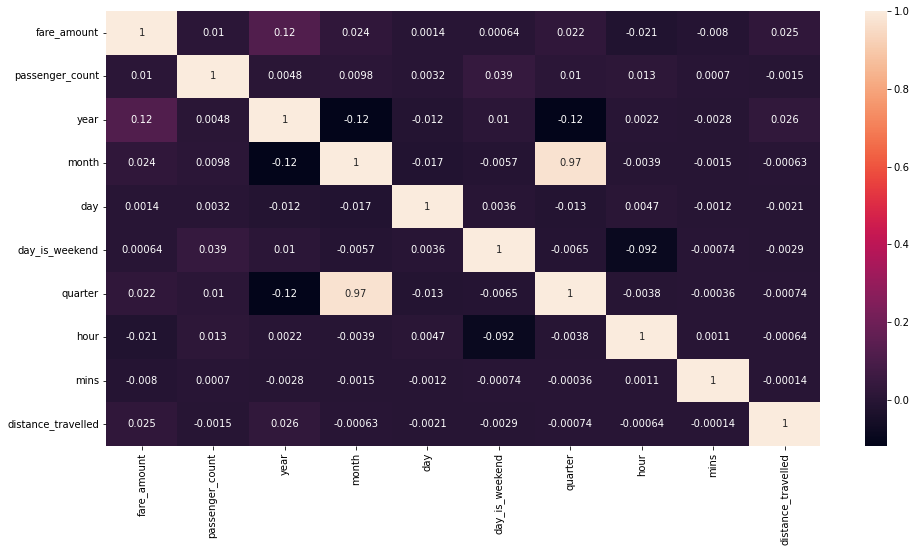

In [63]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

## Outlier_detection

In [64]:
df.head()

,fare_amount,passenger_count,year,month,day,day_is_weekend,quarter,hour,mins,distance_travelled
0,7.5,1,2015,5,7,0,2,19,52,1.683323
1,7.7,1,2009,7,17,0,3,20,4,2.457590
2,12.9,1,2009,8,24,0,3,21,45,5.036377
3,5.3,3,2009,6,26,0,2,8,22,1.661683
4,16.0,5,2014,8,28,0,3,17,47,4.475450


In [65]:
def outlier(df,cols):
    new_df_cap = df.copy()
    for col in cols:
        percentile75 = df[col].quantile(0.75)
        percentile25 = df[col].quantile(0.25)
        iqr = percentile75-percentile25
        upper_limit = percentile75 + 1.5*iqr
        lower_limit = percentile25 - 1.5*iqr

## capping
    
        new_df_cap[col] = np.where(
            new_df_cap[col]>upper_limit,
            upper_limit,
            np.where(
                new_df_cap[col]<lower_limit,
                lower_limit,
                new_df_cap[col] ))
    return new_df_cap

In [66]:
df_wo = outlier(df,df.columns)

<AxesSubplot:>

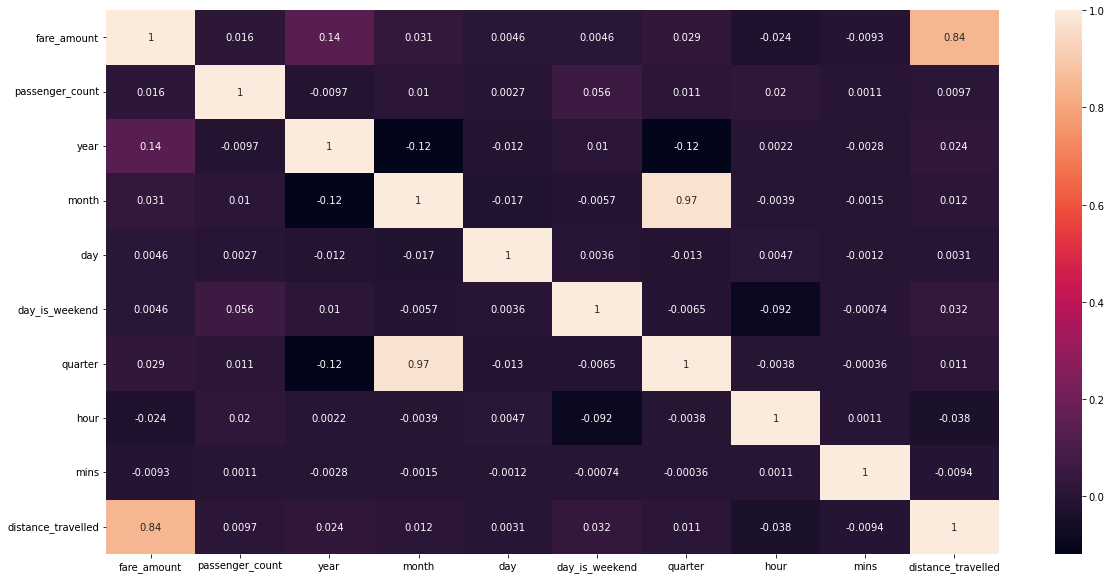

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df_wo.corr(),annot=True)

## Saving the Processed data

In [58]:
processed_df=df_wo.to_csv("./Uber_proper_format",index=False)